# Correlació de Pearson

### Clasificación de eventos usando Correlación de Pearson como seleccionador de características..

-------------------------------------------------------------------------------------------------------------------------------

Alex Toro, Raquel Pezoa

## Librerias necesarias.
-------------------------------------------------------------------------------------------------------------------------------

In [1]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
import winsound

## Lectura del set de datos reducido.

- El set original proviene de https://www.kaggle.com/competitions/higgs-boson/data.
- Separación de la variable Label de las demas variables.
-------------------------------------------------------------------------------------------------------------------------------

In [3]:
df = pd.read_csv("/Users/Alex/Downloads/Pre-procesado.csv")
X_train = df.drop(labels=['Label'], axis=1)
y_train = df['Label']

### Entrega de los datos a la correlación de Pearson.
-------------------------------------------------------------------------------------------------------------------------------

Text(0.5, 1.0, 'Correlation Heatmap')

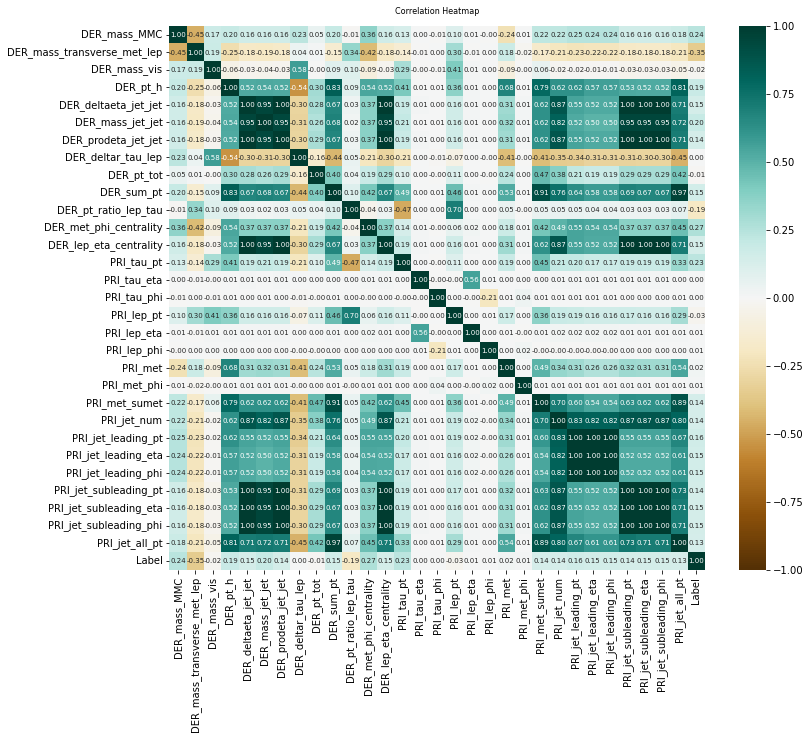

In [4]:
corr_matrix = df.corr(method="pearson")
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap='BrBG', annot = True, fmt=".2f", annot_kws={"size":7})
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':8}, pad=12)

In [5]:
corr_matrix

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
DER_mass_MMC,1.000000,-0.454565,0.172250,0.197366,0.161830,0.160355,0.161689,0.230467,0.048663,0.199939,...,0.219977,0.219547,0.246436,0.243233,0.243216,0.162034,0.161788,0.161785,0.183876,0.237261
DER_mass_transverse_met_lep,-0.454565,1.000000,0.187320,-0.253299,-0.179828,-0.192933,-0.179401,0.042715,0.009326,-0.146486,...,-0.165226,-0.210067,-0.226202,-0.216544,-0.216529,-0.180302,-0.179674,-0.179682,-0.209717,-0.351159
DER_mass_vis,0.172250,0.187320,1.000000,-0.061082,-0.030928,-0.038740,-0.030808,0.577503,-0.001245,0.090625,...,0.057973,-0.022938,-0.015053,-0.009476,-0.009482,-0.031651,-0.030899,-0.030885,-0.049310,-0.015684
DER_pt_h,0.197366,-0.253299,-0.061082,1.000000,0.523925,0.536391,0.523899,-0.544633,0.302904,0.833710,...,0.785054,0.624089,0.624620,0.566766,0.566756,0.531602,0.523953,0.523981,0.808764,0.193857
DER_deltaeta_jet_jet,0.161830,-0.179828,-0.030928,0.523925,1.000000,0.946692,0.999981,-0.301857,0.284992,0.669586,...,0.618114,0.868206,0.547879,0.524274,0.524272,0.999323,0.999995,0.999996,0.710733,0.145527
DER_mass_jet_jet,0.160355,-0.192933,-0.038740,0.536391,0.946692,1.000000,0.945100,-0.307966,0.263892,0.680010,...,0.617483,0.815693,0.524772,0.496041,0.496043,0.948253,0.946163,0.946158,0.719133,0.195348
DER_prodeta_jet_jet,0.161689,-0.179401,-0.030808,0.523899,0.999981,0.945100,1.000000,-0.301855,0.285536,0.669760,...,0.618426,0.868429,0.547876,0.524270,0.524268,0.999325,0.999988,0.999989,0.710930,0.144414
DER_deltar_tau_lep,0.230467,0.042715,0.577503,-0.544633,-0.301857,-0.307966,-0.301855,1.000000,-0.158399,-0.435226,...,-0.408674,-0.350965,-0.340499,-0.308317,-0.308304,-0.306085,-0.301881,-0.301886,-0.450563,0.004843
DER_pt_tot,0.048663,0.009326,-0.001245,0.302904,0.284992,0.263892,0.285536,-0.158399,1.000000,0.401199,...,0.468740,0.376895,0.211105,0.193547,0.193570,0.294010,0.285198,0.285196,0.424815,-0.014507
DER_sum_pt,0.199939,-0.146486,0.090625,0.833710,0.669586,0.680010,0.669760,-0.435226,0.401199,1.000000,...,0.907065,0.756259,0.639221,0.578171,0.578173,0.685376,0.669710,0.669721,0.965813,0.153717


### Convertir los datos a  una lista de duplas.

- Se convierte la matriz entregada por la correlación de Pearson junto a las columnas del dataframe en una lista de duplas.
- Se realizan las duplas para así poder reordenar las variables de la más relevante a la menos relevante.
- Se Reordena la duplas de mayor a menor.
- Se separan las duplas en listas separadas y transformar las 10 primeras en arreglos de numpy.
-------------------------------------------------------------------------------------------------------------------------------

In [6]:
l = []
dif =1.0, 'Label'
for feature in zip(corr_matrix['Label'],df.columns):
    if(dif != feature):
        l.append(feature)
l.sort(reverse=True)
l

[(0.2694915515988635, 'DER_met_phi_centrality'),
 (0.23726092955589645, 'DER_mass_MMC'),
 (0.2328606082210151, 'PRI_tau_pt'),
 (0.19534804186060856, 'DER_mass_jet_jet'),
 (0.1938569228983593, 'DER_pt_h'),
 (0.15973339664168917, 'PRI_jet_leading_pt'),
 (0.15371678637044095, 'DER_sum_pt'),
 (0.1526567561750736, 'PRI_jet_leading_eta'),
 (0.1526224862108924, 'PRI_jet_leading_phi'),
 (0.1455272541074062, 'DER_deltaeta_jet_jet'),
 (0.1452253455091279, 'DER_lep_eta_centrality'),
 (0.14514590541580288, 'PRI_jet_subleading_eta'),
 (0.14513405448811736, 'PRI_jet_subleading_phi'),
 (0.14441387982683138, 'DER_prodeta_jet_jet'),
 (0.14435245536997215, 'PRI_jet_subleading_pt'),
 (0.1380524900265753, 'PRI_met_sumet'),
 (0.13761023264857042, 'PRI_jet_num'),
 (0.1344397314285392, 'PRI_jet_all_pt'),
 (0.019766102889927587, 'PRI_met'),
 (0.009986236015714885, 'PRI_met_phi'),
 (0.007351594846955683, 'PRI_lep_phi'),
 (0.0056633416065110485, 'PRI_lep_eta'),
 (0.0048428896623217465, 'DER_deltar_tau_lep'),
 (

In [7]:
l_i = []
l_v = []
for importance in range(len(l)):
    for var in range(len(l[importance])):
        if(var == 0):
            l_i.append(l[importance][var])
        else:
            l_v.append(l[importance][var])

### Convertir los datos a  una lista de duplas

- Se convierte la matriz entregada por la correlacion de Pearson junto a las columnas del dataframe en una lista de duplas.
- Se realizan las duplas para asi poder reordear las variables de la mas relevante a la menos relevante.
- Se Re-ordena la duplas de mayor a menor.
- Se separan las duplas en listas separadas y tranformar las 10 primeras en arreglos de numpy.
-------------------------------------------------------------------------------------------------------------------------------

In [11]:
import matplotlib.pyplot as plt
import numpy as np
y = np.array(l_i[0:10])
x = np.array(l_v[0:10])
x

array(['DER_met_phi_centrality', 'DER_mass_MMC', 'PRI_tau_pt',
       'DER_mass_jet_jet', 'DER_pt_h', 'PRI_jet_leading_pt', 'DER_sum_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi',
       'DER_deltaeta_jet_jet'], dtype='<U22')

### Graficación de las variables más importantes.

-------------------------------------------------------------------------------------------------------------------------------

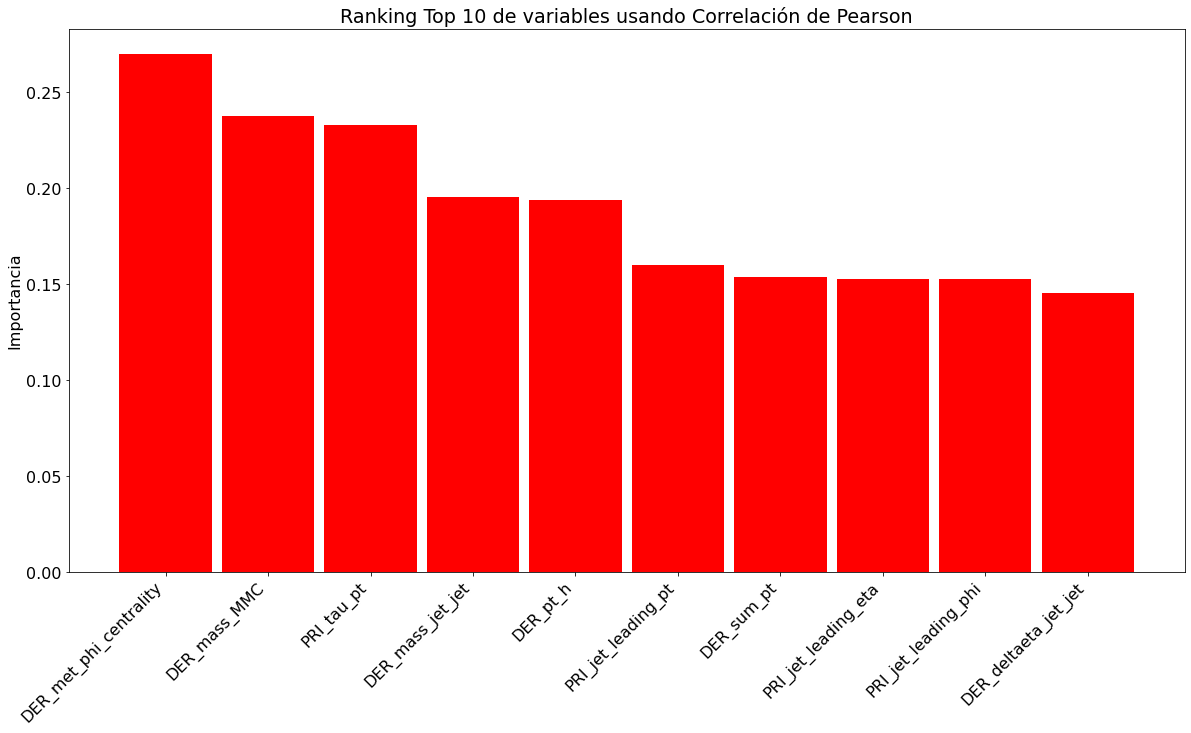

In [12]:
import matplotlib
font = {'size'   : 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize = (20, 10))


# creating the bar plot
plt.ylabel("Importancia")
plt.bar(x, y, color ='red',
        width = 0.9)
plt.xticks(rotation=45, ha='right')
plt.title("Ranking Top 10 de variables usando Correlación de Pearson")
plt.show()

In [13]:
X_train[x].head()

,DER_met_phi_centrality,DER_mass_MMC,PRI_tau_pt,DER_mass_jet_jet,DER_pt_h,PRI_jet_leading_pt,DER_sum_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,DER_deltaeta_jet_jet
0,1.335,85.123,28.827,-999.000,139.856,145.787,212.788,-0.903,0.656,-999.000
1,0.215,70.751,35.467,442.881,107.916,58.119,209.956,-2.876,2.317,4.446
2,-1.358,-999.000,58.913,-999.000,0.998,-999.000,92.329,-999.000,-999.000,-999.000
3,-1.359,74.959,29.469,-999.000,24.962,-999.000,57.390,-999.000,-999.000,-999.000
4,-1.326,-999.000,34.761,-999.000,2.044,-999.000,62.347,-999.000,-999.000,-999.000


In [14]:
import xgboost as xgb

### Entrenamiento, testeo y optimizacion de parametros de DMatrix de XGBoost con las variables entregadas por la correlación de Pearson.
-------------------------------------------------------------------------------------------------------------------------------

In [15]:
X_BestFeature = X_train[x] 
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_BestFeature, y_train, test_size=0.2, random_state=0)

In [16]:
dtrain = xgb.DMatrix(X_train2, label=y_train2)
dtest = xgb.DMatrix(X_test2, label=y_test2)

In [14]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}
params['eval_metric'] = "mae"
num_boost_round = 999

In [15]:
modelo = xgb.train( 
    params, 
    dtrain, 
    num_boost_round=num_boost_round, 
    evals=[(dtest, "Test")], 
    early_stopping_rounds=10 
)

[16:05:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.43372
[1]	Test-mae:0.38614
[2]	Test-mae:0.35137
[3]	Test-mae:0.32684
[4]	Test-mae:0.30840
[5]	Test-mae:0.29568
[6]	Test-mae:0.28692
[7]	Test-mae:0.27933
[8]	Test-mae:0.27345
[9]	Test-mae:0.26936
[10]	Test-mae:0.26661
[11]	Test-mae:0.26427
[12]	Test-mae:0.26316
[13]	Test-mae:0.26166
[14]	Test-mae:0.26081
[15]	Test-mae:0.26035
[16]	Test-mae:0.25951
[17]	Test-mae:0.25914
[18]	Test-mae:0.25912
[19]	Test-mae:0.25851
[20]	Test-mae:0.25797
[21]	Test-mae:0.25793
[22]	Test-mae:0.25790
[23]	Test-mae:0.25787
[24]	Test-mae:0.25764
[25]	Test-mae:0.25759
[26]	Test-mae:0.25766
[27]	Test-mae:0.25765
[28]	Test-mae:0.25750
[29]	Test-mae:0.25743
[30]	Test-mae:0.25755
[31]	Test-mae:0.25756
[32]	Test-mae:0.25760
[33]	Test-mae:0.25715
[34]	Test-mae:0.25714
[35]	Test-mae:0.25717
[36]	Test-mae:0.25679
[37]	Test-mae:0.256

In [16]:
print("Best MAE: {:.2f} with {} rounds".format(
                 modelo.best_score,
                 modelo.best_iteration+1))

Best MAE: 0.26 with 50 rounds


In [17]:
cv_results = xgb.cv( 
    params, 
    dtrain, 
    num_boost_round=num_boost_round, 
    seed=42, 
    nfold=5, 
    metrics={'mae'}, 
    early_stopping_rounds=10 
)
cv_results

[16:05:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:05:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:05:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:05:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:05:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,0.432718,0.000082,0.433757,0.000300
1,0.384290,0.000171,0.386252,0.000699
2,0.349346,0.000196,0.352199,0.001054
3,0.324052,0.000248,0.327713,0.001177
4,0.305231,0.000604,0.309520,0.000955
5,0.291331,0.000603,0.296222,0.001156
6,0.281134,0.001063,0.286678,0.000840
7,0.273052,0.000527,0.279274,0.001720
8,0.267448,0.000741,0.274225,0.001751
9,0.262533,0.000553,0.269940,0.001550


In [18]:
cv_results['test-mae-mean'].min()

0.2567389762782128

In [22]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [23]:
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

CV with max_depth=9, min_child_weight=5
[17:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.25328014857408504 for 39 rounds
CV with max_depth=9, min_child_weigh

[17:15:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[17:15:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.25200774318998725 for 24 rounds
Best params: 11, 5, MAE: 0.2515536913779417


In [19]:
params['max_depth'] = 11
params['min_child_weight'] = 5

In [25]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [26]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

CV with subsample=1.0, colsample=1.0
[17:15:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[17:15:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[17:15:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[17:15:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[17:15:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.2515536913779417 for 23 rounds
CV with subsample=1.0, colsample=0.9
[17

[17:16:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[17:16:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.25230718324672674 for 17 rounds
CV with subsample=0.8, colsample=0.9
[17:17:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[17:17:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[17:17:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[17:17:01] WARNING: C:/Users/Administra

In [20]:
params['subsample'] = 1.
params['colsample_bytree'] = 1.

In [28]:
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            metrics=['mae'],
            early_stopping_rounds=10
          )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

CV with eta=0.3
[17:17:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[17:17:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[17:17:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[17:17:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[17:17:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.2515536913779417 for 23 rounds

CV with eta=0.2
[17:18:06] WARNING: C:/Users/Administrator/w

In [21]:
params['eta'] = .01

In [22]:
params

{'max_depth': 11,
 'min_child_weight': 5,
 'eta': 0.01,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'reg:linear',
 'eval_metric': 'mae'}

In [23]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[16:05:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.49755
[1]	Test-mae:0.49514
[2]	Test-mae:0.49274
[3]	Test-mae:0.49037
[4]	Test-mae:0.48803
[5]	Test-mae:0.48571
[6]	Test-mae:0.48341
[7]	Test-mae:0.48113
[8]	Test-mae:0.47888
[9]	Test-mae:0.47664
[10]	Test-mae:0.47443
[11]	Test-mae:0.47224
[12]	Test-mae:0.47006
[13]	Test-mae:0.46791
[14]	Test-mae:0.46578
[15]	Test-mae:0.46368
[16]	Test-mae:0.46159
[17]	Test-mae:0.45953
[18]	Test-mae:0.45749
[19]	Test-mae:0.45546
[20]	Test-mae:0.45345
[21]	Test-mae:0.45147
[22]	Test-mae:0.44951
[23]	Test-mae:0.44755
[24]	Test-mae:0.44563
[25]	Test-mae:0.44372
[26]	Test-mae:0.44181
[27]	Test-mae:0.43993
[28]	Test-mae:0.43809
[29]	Test-mae:0.43624
[30]	Test-mae:0.43441
[31]	Test-mae:0.43261
[32]	Test-mae:0.43082
[33]	Test-mae:0.42905
[34]	Test-mae:0.42730
[35]	Test-mae:0.42558
[36]	Test-mae:0.42386
[37]	Test-mae:0.422

[354]	Test-mae:0.25502
[355]	Test-mae:0.25494
[356]	Test-mae:0.25486
[357]	Test-mae:0.25478
[358]	Test-mae:0.25470
[359]	Test-mae:0.25463
[360]	Test-mae:0.25455
[361]	Test-mae:0.25447
[362]	Test-mae:0.25440
[363]	Test-mae:0.25432
[364]	Test-mae:0.25425
[365]	Test-mae:0.25418
[366]	Test-mae:0.25411
[367]	Test-mae:0.25403
[368]	Test-mae:0.25396
[369]	Test-mae:0.25389
[370]	Test-mae:0.25383
[371]	Test-mae:0.25377
[372]	Test-mae:0.25370
[373]	Test-mae:0.25363
[374]	Test-mae:0.25356
[375]	Test-mae:0.25350
[376]	Test-mae:0.25343
[377]	Test-mae:0.25336
[378]	Test-mae:0.25329
[379]	Test-mae:0.25322
[380]	Test-mae:0.25316
[381]	Test-mae:0.25310
[382]	Test-mae:0.25304
[383]	Test-mae:0.25298
[384]	Test-mae:0.25292
[385]	Test-mae:0.25286
[386]	Test-mae:0.25280
[387]	Test-mae:0.25274
[388]	Test-mae:0.25268
[389]	Test-mae:0.25263
[390]	Test-mae:0.25257
[391]	Test-mae:0.25252
[392]	Test-mae:0.25246
[393]	Test-mae:0.25240
[394]	Test-mae:0.25235
[395]	Test-mae:0.25230
[396]	Test-mae:0.25224
[397]	Test-

[711]	Test-mae:0.24697
[712]	Test-mae:0.24697
[713]	Test-mae:0.24697
[714]	Test-mae:0.24696
[715]	Test-mae:0.24695
[716]	Test-mae:0.24695
[717]	Test-mae:0.24695
[718]	Test-mae:0.24695
[719]	Test-mae:0.24694
[720]	Test-mae:0.24693
[721]	Test-mae:0.24692
[722]	Test-mae:0.24692
[723]	Test-mae:0.24691
[724]	Test-mae:0.24691
[725]	Test-mae:0.24690
[726]	Test-mae:0.24689
[727]	Test-mae:0.24688
[728]	Test-mae:0.24687
[729]	Test-mae:0.24687
[730]	Test-mae:0.24687
[731]	Test-mae:0.24687
[732]	Test-mae:0.24686
[733]	Test-mae:0.24685
[734]	Test-mae:0.24684
[735]	Test-mae:0.24683
[736]	Test-mae:0.24683
[737]	Test-mae:0.24683
[738]	Test-mae:0.24682
[739]	Test-mae:0.24682
[740]	Test-mae:0.24681
[741]	Test-mae:0.24680
[742]	Test-mae:0.24680
[743]	Test-mae:0.24679
[744]	Test-mae:0.24679
[745]	Test-mae:0.24679
[746]	Test-mae:0.24678
[747]	Test-mae:0.24678
[748]	Test-mae:0.24678
[749]	Test-mae:0.24678
[750]	Test-mae:0.24678
[751]	Test-mae:0.24677
[752]	Test-mae:0.24676
[753]	Test-mae:0.24676
[754]	Test-

In [24]:
um_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[16:06:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.49755
[1]	Test-mae:0.49514
[2]	Test-mae:0.49274
[3]	Test-mae:0.49037
[4]	Test-mae:0.48803
[5]	Test-mae:0.48571
[6]	Test-mae:0.48341
[7]	Test-mae:0.48113
[8]	Test-mae:0.47888
[9]	Test-mae:0.47664
[10]	Test-mae:0.47443
[11]	Test-mae:0.47224
[12]	Test-mae:0.47006
[13]	Test-mae:0.46791
[14]	Test-mae:0.46578
[15]	Test-mae:0.46368
[16]	Test-mae:0.46159
[17]	Test-mae:0.45953
[18]	Test-mae:0.45749
[19]	Test-mae:0.45546
[20]	Test-mae:0.45345
[21]	Test-mae:0.45147
[22]	Test-mae:0.44951
[23]	Test-mae:0.44755
[24]	Test-mae:0.44563
[25]	Test-mae:0.44372
[26]	Test-mae:0.44181
[27]	Test-mae:0.43993
[28]	Test-mae:0.43809
[29]	Test-mae:0.43624
[30]	Test-mae:0.43441
[31]	Test-mae:0.43261
[32]	Test-mae:0.43082
[33]	Test-mae:0.42905
[34]	Test-mae:0.42730
[35]	Test-mae:0.42558
[36]	Test-mae:0.42386
[37]	Test-mae:0.422

[710]	Test-mae:0.24698
[711]	Test-mae:0.24697
[712]	Test-mae:0.24697
[713]	Test-mae:0.24697
[714]	Test-mae:0.24696
[715]	Test-mae:0.24695
[716]	Test-mae:0.24695
[717]	Test-mae:0.24695
[718]	Test-mae:0.24695
[719]	Test-mae:0.24694
[720]	Test-mae:0.24693
[721]	Test-mae:0.24692
[722]	Test-mae:0.24692
[723]	Test-mae:0.24691
[724]	Test-mae:0.24691
[725]	Test-mae:0.24690
[726]	Test-mae:0.24689
[727]	Test-mae:0.24688
[728]	Test-mae:0.24687
[729]	Test-mae:0.24687
[730]	Test-mae:0.24687
[731]	Test-mae:0.24687
[732]	Test-mae:0.24686
[733]	Test-mae:0.24685
[734]	Test-mae:0.24684
[735]	Test-mae:0.24683
[736]	Test-mae:0.24683
[737]	Test-mae:0.24683
[738]	Test-mae:0.24682
[739]	Test-mae:0.24682
[740]	Test-mae:0.24681
[741]	Test-mae:0.24680
[742]	Test-mae:0.24680
[743]	Test-mae:0.24679
[744]	Test-mae:0.24679
[745]	Test-mae:0.24679
[746]	Test-mae:0.24678
[747]	Test-mae:0.24678
[748]	Test-mae:0.24678
[749]	Test-mae:0.24678
[750]	Test-mae:0.24678
[751]	Test-mae:0.24677
[752]	Test-mae:0.24676
[753]	Test-

In [25]:
mean_absolute_error(best_model.predict(dtest), y_test2)

0.24591647278176437

### Guardado del modelo y predicciones.
-------------------------------------------------------------------------------------------------------------------------------

In [26]:
best_model.save_model("Corr_Pearson.model")

In [17]:
loaded_model = xgb.Booster()
loaded_model.load_model("Corr_Pearson.model")
# And use it for predictions.
Prediccion = Prediccion = loaded_model.predict(dtest)

[12:04:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [18]:
Prediccion.min()

-0.17409486

In [19]:
Prediccion.max()

1.0897242

In [20]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, classification_report, roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay

In [21]:
testing_list =[]
for i in  np.linspace(0.1,0.9,9):
    d = {}
    y_p = Prediccion >= i
    print("Threshold:",i)
    cm = confusion_matrix(y_test2,y_p)
    d["th"] = i
    d["F1"] = np.round(f1_score(y_test2,y_p),2)
    d["Prec"] = np.round(precision_score(y_test2,y_p),2)
    d["Rec"] = np.round(recall_score(y_test2,y_p),2)
    d["Acc"] = np.round(accuracy_score(y_test2,y_p),2)
    d["RocAuc"] = np.round(roc_auc_score(y_test2,y_p),2)
    testing_list.append(d)

Threshold: 0.1
Threshold: 0.2
Threshold: 0.30000000000000004
Threshold: 0.4
Threshold: 0.5
Threshold: 0.6
Threshold: 0.7000000000000001
Threshold: 0.8
Threshold: 0.9


# Metricas para cada umbral.
- th: umbral
-------------------------------------------------------------------------------------------------------------------------------

In [22]:
testing_metrics_pd = pd.DataFrame(testing_list)
testing_metrics_pd

,th,F1,Prec,Rec,Acc,RocAuc
0,0.1,0.65,0.49,0.96,0.65,0.73
1,0.2,0.71,0.58,0.91,0.75,0.79
2,0.3,0.74,0.65,0.84,0.80,0.81
3,0.4,0.74,0.72,0.77,0.82,0.81
4,0.5,0.73,0.77,0.69,0.83,0.79
5,0.6,0.69,0.82,0.60,0.82,0.77
6,0.7,0.64,0.86,0.50,0.81,0.73
7,0.8,0.53,0.90,0.38,0.78,0.68
8,0.9,0.37,0.95,0.23,0.74,0.61


In [23]:
print(testing_metrics_pd.to_latex(index=False))

\begin{tabular}{rrrrrr}
\toprule
 th &   F1 &  Prec &  Rec &  Acc &  RocAuc \\
\midrule
0.1 & 0.65 &  0.49 & 0.96 & 0.65 &    0.73 \\
0.2 & 0.71 &  0.58 & 0.91 & 0.75 &    0.79 \\
0.3 & 0.74 &  0.65 & 0.84 & 0.80 &    0.81 \\
0.4 & 0.74 &  0.72 & 0.77 & 0.82 &    0.81 \\
0.5 & 0.73 &  0.77 & 0.69 & 0.83 &    0.79 \\
0.6 & 0.69 &  0.82 & 0.60 & 0.82 &    0.77 \\
0.7 & 0.64 &  0.86 & 0.50 & 0.81 &    0.73 \\
0.8 & 0.53 &  0.90 & 0.38 & 0.78 &    0.68 \\
0.9 & 0.37 &  0.95 & 0.23 & 0.74 &    0.61 \\
\bottomrule
\end{tabular}



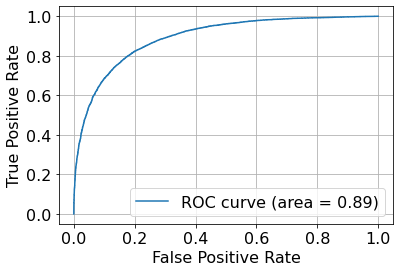

In [24]:
fpr, tpr, ths = roc_curve(y_test2,  Prediccion)
auc_ = auc(fpr, tpr)
plt.plot(fpr,tpr, label='ROC curve (area = %.2f)' %auc_)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.grid()
plt.show()

In [25]:
for i in  np.linspace(0.1,0.9,9):
    print(i)
    y_p = Prediccion >= i
    print(classification_report(y_test2, y_p))
    f1 = f1_score(y_test2, y_p)
    prec = precision_score(y_test2, y_p)
    rec = recall_score(y_test2, y_p)
    acc = accuracy_score(y_test2, y_p)
    cm=confusion_matrix(y_test2, y_p)
    print("Matriz de confusión: ")
    print(cm)
    print("----------------------------------------------------------")
    print("F1: %.2f" %f1 , " -- prec: %.2f" %prec, " -- recall: %.2f" %rec, " -- acc: %.2f" %acc)
    print("----------------------------------------------------------")

0.1
              precision    recall  f1-score   support

           0       0.96      0.50      0.66     13263
           1       0.49      0.96      0.65      6737

    accuracy                           0.65     20000
   macro avg       0.73      0.73      0.65     20000
weighted avg       0.80      0.65      0.66     20000

Matriz de confusión: 
[[6608 6655]
 [ 258 6479]]
----------------------------------------------------------
F1: 0.65  -- prec: 0.49  -- recall: 0.96  -- acc: 0.65
----------------------------------------------------------
0.2
              precision    recall  f1-score   support

           0       0.93      0.67      0.78     13263
           1       0.58      0.91      0.71      6737

    accuracy                           0.75     20000
   macro avg       0.76      0.79      0.74     20000
weighted avg       0.81      0.75      0.75     20000

Matriz de confusión: 
[[8832 4431]
 [ 626 6111]]
----------------------------------------------------------
F1: 0.71

In [46]:
umbral = 0.4

In [47]:
maskSignal=Prediccion>umbral

In [48]:
predicBin=[]
for i in maskSignal:
    if(i==True):
        predicBin.append(1)
    else:
        predicBin.append(0)

In [49]:
npPredict=np.array(predicBin)

In [50]:
cm=confusion_matrix(y_test2, npPredict)
cm

array([[11236,  2027],
       [ 1572,  5165]], dtype=int64)

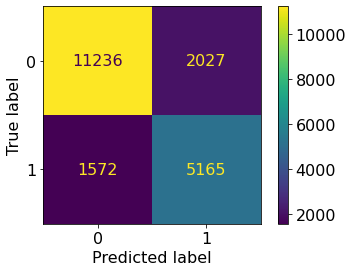

In [51]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [52]:
f1= f1_score(y_test2, npPredict)
f1

0.7416182066192837

In [33]:
prec=precision_score(y_test2, npPredict)
prec

0.7181590656284761

In [34]:
rec=recall_score(y_test2, npPredict)
rec

0.7666617188659641

In [35]:
accu=accuracy_score(y_test2, npPredict)
accu

0.82005

In [36]:
print(classification_report(y_test2, npPredict))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86     13263
           1       0.72      0.77      0.74      6737

    accuracy                           0.82     20000
   macro avg       0.80      0.81      0.80     20000
weighted avg       0.82      0.82      0.82     20000



In [37]:
print("F1: %.2f" %f1 , " -- prec: %.2f" %prec, " -- recall: %.2f" %rec, " -- acc: %.2f" %acc)

F1: 0.74  -- prec: 0.72  -- recall: 0.77  -- acc: 0.74


In [38]:
X_train2

,DER_met_phi_centrality,DER_mass_MMC,PRI_tau_pt,DER_mass_jet_jet,DER_pt_h,PRI_jet_leading_pt,DER_sum_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,DER_deltaeta_jet_jet
10382,1.097,93.006,33.106,1153.352,362.070,206.255,633.979,-1.991,1.301,3.696
73171,-0.955,200.846,33.480,-999.000,10.720,-999.000,87.521,-999.000,-999.000,-999.000
30938,-1.297,132.315,68.190,-999.000,55.634,53.473,158.490,-0.572,-0.312,-999.000
99310,-1.411,162.959,39.265,-999.000,0.542,-999.000,83.637,-999.000,-999.000,-999.000
58959,1.400,120.253,39.923,407.579,38.736,59.401,243.103,1.342,-0.369,3.918
...,...,...,...,...,...,...,...,...,...,...
21243,-1.414,97.624,23.759,-999.000,31.254,31.717,106.339,-0.241,-2.613,-999.000
45891,-0.351,103.548,51.768,148.392,87.827,75.383,236.710,0.544,-0.128,1.613
42613,-1.414,-999.000,43.624,-999.000,1.191,-999.000,90.848,-999.000,-999.000,-999.000
43567,1.203,83.656,28.443,-999.000,24.514,-999.000,55.451,-999.000,-999.000,-999.000
